In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.model_selection import train_test_split , GridSearchCV

#for evaluation
from sklearn.metrics import accuracy_score, precision_score ,f1_score ,recall_score, classification_report, confusion_matrix


#models for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [203]:
df_matches = pd.read_csv('pl_matches.csv')

In [204]:
columns_to_delete = ['Unnamed: 0', 'date', 'time', 'comp', 'captain', 'attendance', 'match report', 'notes', 'gf', 'ga']
df_matches.drop(columns=columns_to_delete, inplace=True)

In [205]:
df_matches.head()

,round,day,venue,result,opponent,xg,xga,poss,formation,referee,sh,sot,dist,fk,pk,pkatt,season,team
0,Matchweek 2,Mon,Away,W,Wolves,1.9,0.6,65,4-2-3-1,Andre Marriner,13,8,21.1,2,1,1,2024,Manchester City
1,Matchweek 3,Sun,Home,L,Leicester City,0.9,2.9,72,4-2-3-1,Michael Oliver,16,5,19.8,1,0,0,2024,Manchester City
2,Matchweek 4,Sat,Away,D,Leeds United,1.2,2.4,49,4-3-3,Mike Dean,23,1,18.2,1,0,0,2024,Manchester City
3,Matchweek 5,Sat,Home,W,Arsenal,1.3,0.9,58,3-1-4-2,Chris Kavanagh,13,5,17.7,0,0,0,2024,Manchester City
4,Matchweek 6,Sat,Away,D,West Ham,1.0,0.3,69,4-3-3,Anthony Taylor,14,7,20.9,1,0,0,2024,Manchester City


<Axes: >

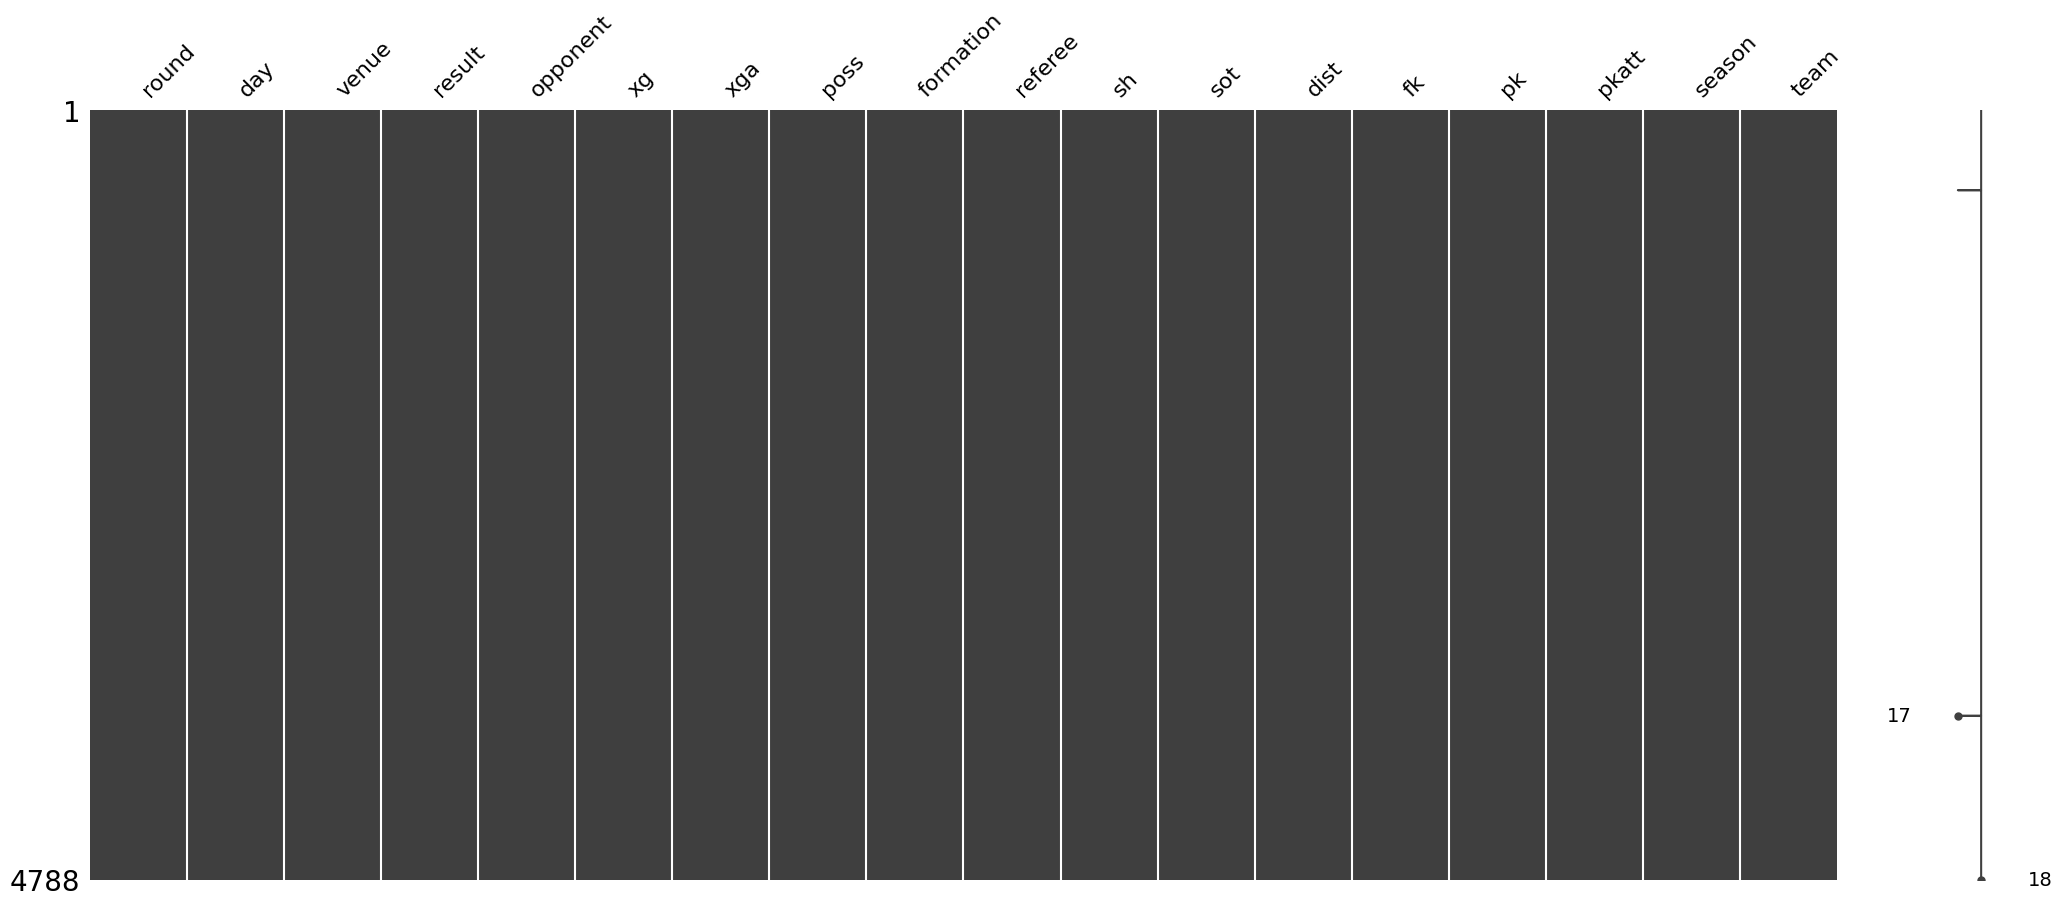

In [206]:
import missingno as msno
msno.matrix(df_matches)

In [207]:
df_matches['round'] = df_matches['round'].apply(lambda x: x.split(' ')[1])
df_matches['round'] = df_matches['round'].astype(int)

day_map = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}
df_matches['day'] = df_matches['day'].map(day_map)

venue_map = {'Home': 1, 'Away': 0}
df_matches['venue'] = df_matches['venue'].map(venue_map)

result_map = {'W': 3, 'D': 1, 'L': 0}
df_matches['result'] = df_matches['result'].map(result_map)

formation_map = {
    '4-2-3-1': 22,
    '4-3-3': 21,
    '4-4-2': 20,
    '3-4-3': 19,
    '3-5-2': 18,
    '4-1-4-1': 17,
    '4-4-1-1': 16,    
    '3-4-1-2': 15,    
    '5-3-2': 14,    
    '5-4-1': 13,       
    '4-5-1': 12,          
    '4-3-1-2': 11,         
    '4-1-2-1-2◆': 10,      
    '4-2-2-2': 9,         
    '3-1-4-2': 8,         
    '4-3-2-1': 7,         
    '3-2-4-1': 6,         
    '3-3-3-1': 5,         
    '3-5-1-1': 4,         
    '3-4-3◆': 3,          
    '4-1-3-2': 2,          
    '4-2-4-0': 1}
df_matches['formation'] = df_matches['formation'].map(formation_map)

referee_map = {
    'Anthony Taylor' : 34,       
    'Michael Oliver': 33,       
    'Paul Tierney': 32,     
    'Craig Pawson':   31,         
    'Stuart Attwell': 30,      
    'Chris Kavanagh': 29,       
    'Martin Atkinson': 28,      
    'David Coote': 27,          
    'Andre Marriner': 26,
    'Mike Dean': 25,
    'Jonathan Moss': 24,
    'Andy Madley': 23,
    'Simon Hooper': 22,
    'Kevin Friend': 21,
    'Peter Bankes': 20,
    'Robert Jones': 19,
    'Graham Scott': 18,
    'Darren England': 17,
    'Jarred Gillett': 16,
    'John Brooks': 15,
    'Lee Mason': 14,
    'Michael Salisbury': 13,
    'Tim Robinson': 12, 
    'Thomas Bramall': 11,
    'Tony Harrington': 10,
    'Samuel Barrott': 9,
    'Darren Bond': 8,
    'Joshua Smith': 7,
    'Samuel Allison': 6,
    'Oliver Langford': 5,
    'Lewis Smith': 4,
    'Robert Madley': 3,
    'Rebecca Welch': 2,
    'Matt Donohue': 1,
    'Sunny Singh': 0}
df_matches['referee'] = df_matches['referee'].map(referee_map)


nombres_completos = {
    'Manchester Utd': 'Manchester United',
    'Tottenham Hotspur': 'Tottenham',
    'Newcastle Utd': 'Newcastle United',
    'West Ham United': 'West Ham',
    'Sheffield Utd': 'Sheffield United',
    'Nott\'ham Forest': 'Nottingham Forest',
    'Brighton and Hove Albion': 'Brighton',
    'Wolverhampton Wanderers': 'Wolves',
    'West Bromwich Albion': 'West Brom'}

teams_map = {
    'Manchester City':  26,
    'Liverpool':  25,
    'Arsenal':  24,
    'Chelsea':  23,
    'Manchester United':  22,
    'Tottenham':  21,
    'Aston Villa':  20,
    'Brighton':  19,
    'Wolves':  18,
    'Newcastle United':  17,
    'Crystal Palace':  16,
    'Everton':  15,
    'West Ham':  14,
    'Leicester City':  13,
    'Southampton':  12,
    'Burnley':  11,
    'Leeds United':  10,
    'Fulham':  9,
    'Sheffield United':  8,
    'Bournemouth':  7,
    'Brentford':  6,
    'West Brom':  5,
    'Nottingham Forest':  4,
    'Watford':  3,
    'Norwich City':  2,
    'Luton Town':  1}

df_matches['team'] = df_matches['team'].replace(nombres_completos)
df_matches['opponent'] = df_matches['opponent'].replace(nombres_completos)
df_matches['team'] = df_matches['team'].map(teams_map)
df_matches['opponent'] = df_matches['opponent'].map(teams_map)

df_matches.head()

,round,day,venue,result,opponent,xg,xga,poss,formation,referee,sh,sot,dist,fk,pk,pkatt,season,team
0,2,1,0,3,18,1.9,0.6,65,22,26,13,8,21.1,2,1,1,2024,26
1,3,7,1,0,13,0.9,2.9,72,22,33,16,5,19.8,1,0,0,2024,26
2,4,6,0,1,10,1.2,2.4,49,21,25,23,1,18.2,1,0,0,2024,26
3,5,6,1,3,24,1.3,0.9,58,8,29,13,5,17.7,0,0,0,2024,26
4,6,6,0,1,14,1.0,0.3,69,21,34,14,7,20.9,1,0,0,2024,26


In [208]:
df_matches = df_matches.dropna()
X = df_matches.drop(columns='result')
y = df_matches['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)}

df_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    df_models.append([name, accuracy, precision, recall, f1])

df_models = pd.DataFrame(df_models, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
df_models.sort_values(by='Accuracy', ascending=False)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali

,Model,Accuracy,Precision,Recall,F1
1,Random Forest,0.742171,0.748335,0.742171,0.723025
4,Decision Tree,0.669102,0.664855,0.669102,0.666620
5,Gradient Boosting,0.644050,0.609807,0.644050,0.595175
6,AdaBoost,0.617954,0.557921,0.617954,0.565178
0,Logistic Regression,0.575157,0.505108,0.575157,0.510678
3,KNN,0.529228,0.525186,0.529228,0.516425
2,SVC,0.406054,0.164880,0.406054,0.234529


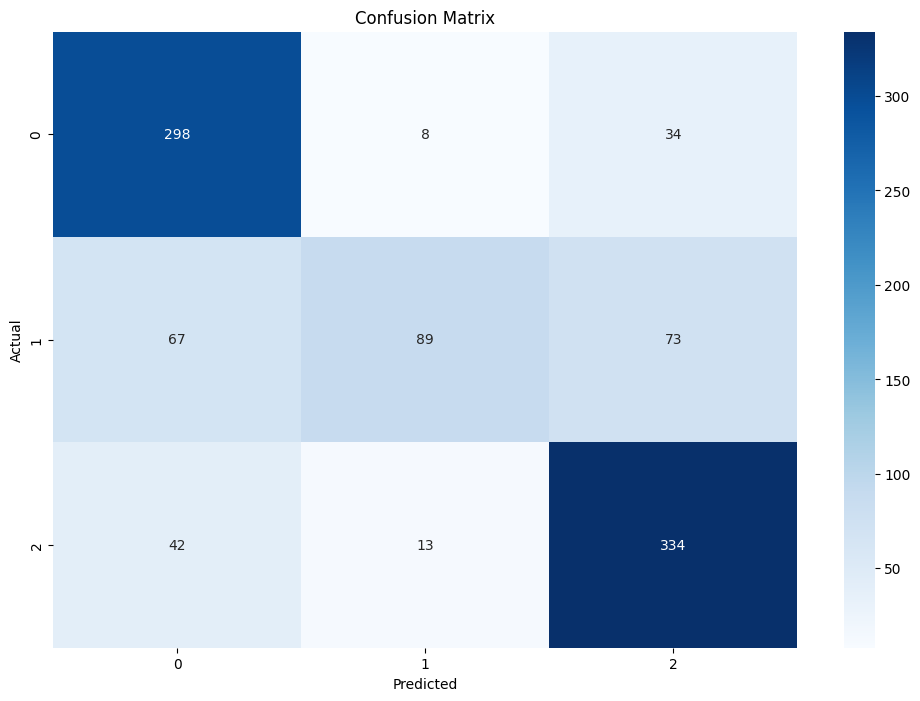

In [209]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [139]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
{'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
0.7241389784808614
RandomForestClassifier(max_depth=40, n_estimators=400)


In [210]:
rf = RandomForestClassifier(max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=400)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

df_results = []
model_name = 'Random Forest (Grid Search)'
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
df_results.append([model_name, accuracy, precision, recall, f1])

df_results = pd.DataFrame(df_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
df_models = pd.concat([df_models, df_results])
df_models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1
0,Random Forest (Grid Search),0.753653,0.765769,0.753653,0.734922
1,Random Forest,0.742171,0.748335,0.742171,0.723025
4,Decision Tree,0.669102,0.664855,0.669102,0.666620
5,Gradient Boosting,0.644050,0.609807,0.644050,0.595175
6,AdaBoost,0.617954,0.557921,0.617954,0.565178
0,Logistic Regression,0.575157,0.505108,0.575157,0.510678
3,KNN,0.529228,0.525186,0.529228,0.516425
2,SVC,0.406054,0.164880,0.406054,0.234529


In [211]:
df_RF_models = df_models.sort_values(by='Accuracy', ascending=False).head(2)
df_RF_models

,Model,Accuracy,Precision,Recall,F1
0,Random Forest (Grid Search),0.753653,0.765769,0.753653,0.734922
1,Random Forest,0.742171,0.748335,0.742171,0.723025


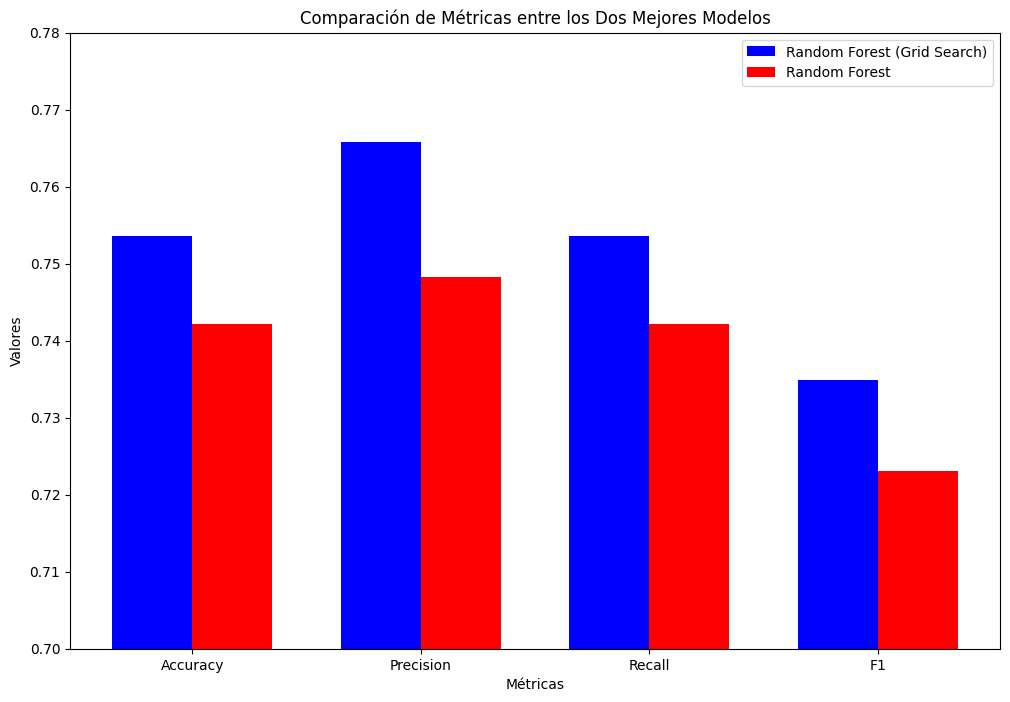

In [212]:
plt.figure(figsize=(12, 8))
bar_width = 0.35
bar_positions = np.arange(len(df_RF_models.columns[1:]))

for i, model in enumerate(df_RF_models['Model']):
    plt.bar(bar_positions + i * bar_width, df_RF_models.loc[df_RF_models['Model'] == model].iloc[0, 1:], 
            bar_width, label=model, color=['blue', 'red'][i])

plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.title('Comparación de Métricas entre los Dos Mejores Modelos')
plt.xticks(bar_positions + bar_width / 2, df_RF_models.columns[1:])
plt.legend()
plt.ylim(0.7, 0.78)
plt.show()

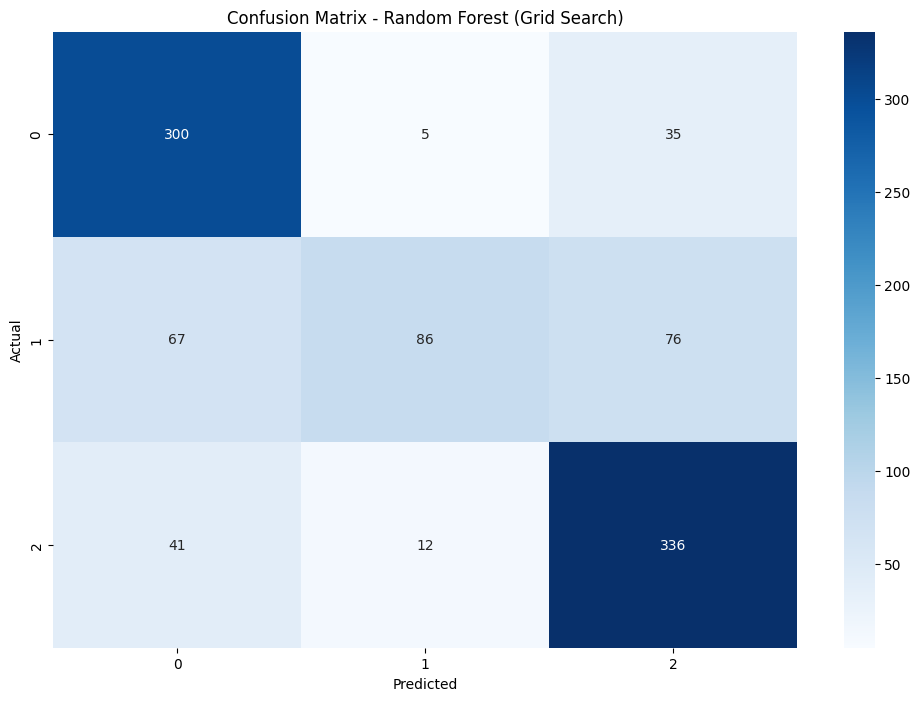

In [214]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Grid Search)')
plt.show()